In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import
df_train_feat = pd.read_csv('../data/_raw/Training set values - 4910797b-ee55-40a7-8668-10efd5c1b960.csv', index_col='id')
df_train_labels = pd.read_csv('../data/_raw/Training set labels - 0bf8bc6e-30d0-4c50-956a-603fc693d966.csv', index_col='id')
df_contest = pd.read_csv('../data/_raw/Test set values - 702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv', index_col='id')


In [3]:
df_train = df_train_feat.merge(df_train_labels, right_index=True, left_index=True)
df_train['is_train'] = 1
df_train['is_contest'] = 0
df_train

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,1,0
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,1,0
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,1,0
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,1,0
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,1,0
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,1,0


In [4]:
df_contest['status_group'] = 'n/a'
df_contest['is_train'] = 0
df_contest['is_contest'] = 1
df_contest

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest
id,,,,,,,,,,,,,,,,,,,,,
50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,n/a,0,1
51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,...,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,n/a,0,1
17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,n/a,0,1
45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,...,dry,dry,shallow well,shallow well,groundwater,other,other,n/a,0,1
49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,n/a,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,n/a,0,1
18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,n/a,0,1
28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,...,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,n/a,0,1


In [5]:
############################
############################

is_training_data_only = 0

############################
############################

In [6]:
# setting the dataframe for feature engineering
# might have to include the contest set and split back out after ETL ??


# use both training and contest
# appends on top of each other (vertically)

if is_training_data_only == 1:
    df = df_train
else:
    df = df_train.append(df_contest)

df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,1,0
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,1,0
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,1,0
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,n/a,0,1
18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,n/a,0,1
28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,...,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,n/a,0,1


### Filtering Rows (3 classes --> 2 classes)

In [7]:
# filter out the rows which are status_group = 'functional needs repair'
# will simplify modelling / learning
# small % of 


In [8]:
df[df['is_train'] == 1].groupby('status_group').size()

status_group
functional                 32259
functional needs repair     4317
non functional             22824
dtype: int64

In [9]:
df_original = df

#### now the dataframe only has 2 classes for the reponse variables

In [10]:
df = df[(df['status_group'] != 'functional needs repair')]

# feature engineering
=====================================

# ^^^^^^^ quantitative features

### immute - Construction Year
===============================

In [11]:
# attempt to find clustering/relationship between construction year and some other features
# after EDA, it was found that a grouping of wells by [basin, water_quality, extraction_type_group] had minimal spread of construction year

df_construction_year_median = pd.read_csv('../data/interim/df_construction_year_median.csv')
df_construction_year_median.set_index(['water_quality', 'extraction_type_group', 'basin'], inplace=True)
df_construction_year_median

construction_year
water_quality extraction_type_group basin                                     
coloured      afridev               Internal                              2008
                                    Rufiji                                2004
              gravity               Internal                              2002
                                    Lake Nyasa                            2004
                                    Lake Rukwa                            1998
...                                                                        ...
unknown       swn 80                Pangani                               2007
                                    Rufiji                                1995
                                    Ruvuma / Southern Coast               1995
                                    Wami / Ruvu                           1994
              wind-powered          Internal                              1960

[375 rows x 1 columns]

In [12]:
# testing lookup
df_construction_year_median.at[('coloured', 'afridev', 'Internal'),'construction_year']

2008

In [13]:
def get_custom_construction_year(water_q, extraction_type_g, bas, cons_year):
    if cons_year != 0:
        return cons_year
    elif cons_year == 0:
        try:
            return df_construction_year_median.at[(water_q, extraction_type_g, bas),'construction_year']
        except KeyError:
            return cons_year
    else:
        return cons_year

In [14]:
df[['water_quality', 'extraction_type_group', 'basin', 'construction_year']]

,water_quality,extraction_type_group,basin,construction_year
id,,,,
69572,soft,gravity,Lake Nyasa,1999
8776,soft,gravity,Lake Victoria,2010
34310,soft,gravity,Pangani,2009
67743,soft,submersible,Ruvuma / Southern Coast,1986
19728,soft,gravity,Lake Victoria,0
...,...,...,...,...
39307,soft,mono,Wami / Ruvu,1988
18990,salty,nira/tanira,Pangani,1994
28749,soft,gravity,Internal,2010


In [15]:
df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,1,0
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,1,0
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,1,0
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,n/a,0,1
18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,n/a,0,1
28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,...,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,n/a,0,1


In [16]:
df.loc[:,'construction_year_2'] = df.apply(lambda row: get_custom_construction_year(row['water_quality'],
                                                                              row['extraction_type_group'], 
                                                                              row['basin'], 
                                                                              row['construction_year']),
                                     axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:
df[df['construction_year_2'] == 0]
# we see that there are still ~ 500 rows that still need to be filled.
# for this remaining amount we will fill using the median of basin (for now)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest,construction_year_2
id,,,,,,,,,,,,,,,,,,,,,
48593,0.0,2011-07-11,Hesawa,0,DWE,31.453111,-1.194390e+00,Kagashani,0,Lake Victoria,...,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,1,0,0
6758,0.0,2012-12-14,Government Of Tanzania,0,DWE,34.303924,-3.176372e+00,Busulwa,0,Internal,...,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,1,0,0
71634,0.0,2012-10-21,Government Of Tanzania,0,DWE,32.887787,-4.219699e+00,Sokoni,0,Lake Tanganyika,...,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional,1,0,0
24052,0.0,2011-07-13,Government Of Tanzania,0,DWE,31.504346,-1.385781e+00,Kwa Mfuka,0,Lake Victoria,...,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,1,0,0
13866,0.0,2012-10-29,Rwssp,0,DWE,32.648268,-3.733956e+00,Said Mashimba,0,Lake Victoria,...,dry,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,2011-04-17,World Bank,0,DWE,35.914781,-4.640197e+00,Msikitini,0,Internal,...,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,n/a,0,1,0
43999,0.0,2012-10-10,Dwe,0,WEDECO,33.170460,-4.211639e+00,Ujenzi,0,Internal,...,insufficient,dam,dam,surface,communal standpipe multiple,communal standpipe,n/a,0,1,0
31381,0.0,2012-10-23,Lwi,0,LWI,0.000000,-2.000000e-08,Mikuyuni,0,Lake Victoria,...,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,n/a,0,1,0


In [ ]:
# for any remaining pumps with construction year = 0, backfill with the median year grouped by basin

In [18]:
non_0_median_constr_year_by_basin = df[['basin', 'construction_year']][df['construction_year']!=0].groupby('basin').median().to_dict()
non_0_median_constr_year_by_basin

{'construction_year': {'Internal': 2002,
  'Lake Nyasa': 2000,
  'Lake Rukwa': 1989,
  'Lake Tanganyika': 1996,
  'Lake Victoria': 1998,
  'Pangani': 2000,
  'Rufiji': 2000,
  'Ruvuma / Southern Coast': 1996,
  'Wami / Ruvu': 2004}}

In [19]:
non_0_median_constr_year_by_basin['construction_year']['Internal']

2002

In [20]:
list(non_0_median_constr_year_by_basin['construction_year'].keys())

['Internal',
 'Lake Nyasa',
 'Lake Rukwa',
 'Lake Tanganyika',
 'Lake Victoria',
 'Pangani',
 'Rufiji',
 'Ruvuma / Southern Coast',
 'Wami / Ruvu']

In [21]:
for basin in list(non_0_median_constr_year_by_basin['construction_year'].keys()):
    df.loc[(df['construction_year_2'] == 0) & (df['basin'] == basin), 'construction_year_2'] =\
    non_0_median_constr_year_by_basin['construction_year'][basin]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
len(df[df['construction_year_2'] == 0])

0

In [23]:
df[['basin', 'construction_year']][df['construction_year_2']==0].groupby('basin').median()

,construction_year
basin,


In [24]:
# now that the column is filled, drop the old column and rename the new one:

df.drop(columns='construction_year', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
df.rename(columns={'construction_year_2':'construction_year'}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group', 'is_train',
       'is_contest', 'construction_year'],
      dtype='object')

### immute  - Latitude / Longitude
===============================

In [27]:
df['region'][df['longitude']==0].value_counts()

Mwanza       964
Shinyanga    919
Name: region, dtype: int64

In [28]:
df['region'][df['latitude'] == -2.000000e-08].value_counts()

Mwanza       964
Shinyanga    919
Name: region, dtype: int64

it is observed  that the wells with missing longitude and latutde are only in 2 regions:

Shinyanga, Tanzania
- https://www.latlong.net/place/shinyanga-tanzania-21938.html
- Latitude: -3.680996
- Longitude: 33.427139

Mwanza, Tanzania
- https://www.latlong.net/place/mwanza-malawi-10498.html
- Latitude: -15.609150
- Longitude: 34.522820

https://www.pgc.umn.edu/apps/convert/

however for simplicity, will take the median as a quick substitute (with the 0's filtered out).
(geographic coordinates appear to be a bad fit for the existing dataset)


In [29]:
# zero_val = 0
# region = Shinyanga
# df[['latitude', 'region']].query("(latitude == 0) & (region == 'Shinyanga')")

df[(df['latitude']== -2.000000e-08) & (df['region'] == 'Shinyanga')]

# df.query("latitude == -2.000000e-08 & region == 'Shinyanga'")

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest,construction_year
id,,,,,,,,,,,,,,,,,,,,,
6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,...,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,functional,1,0,2000
72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,...,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0,2002
56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,...,enough,shallow well,shallow well,groundwater,other,other,non functional,1,0,1996
32089,0.0,2012-10-29,Government Of Tanzania,0,DWE,0.0,-2.000000e-08,Igunabarui,0,Lake Victoria,...,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,1,0,1998
51220,0.0,2012-10-21,Wsdp,0,DWE,0.0,-2.000000e-08,Nguvukazi,0,Lake Victoria,...,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,1,0,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65912,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Igunabangokolo,0,Lake Victoria,...,enough,shallow well,shallow well,groundwater,hand pump,hand pump,n/a,0,1,1998
27394,0.0,2013-02-06,Dwssp,0,DWE,0.0,-2.000000e-08,Ng'Wababili,0,Lake Victoria,...,enough,shallow well,shallow well,groundwater,hand pump,hand pump,n/a,0,1,1993
31381,0.0,2012-10-23,Lwi,0,LWI,0.0,-2.000000e-08,Mikuyuni,0,Lake Victoria,...,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,n/a,0,1,1998


In [30]:
# helper function
def fill_0_lat_long(lat_or_long, region):
    '''fills the 0 or near 0 lat or long based on the region
    '''
    if lat_or_long == 'latitude':
        zero_val = -2.000000e-08
    elif lat_or_long == 'longitude':
        zero_val = 0
    else:
        zero_val = 0
    
    # get the median lat/long and fill with that
    fill_value = np.median(df[lat_or_long][(df[lat_or_long]!=zero_val) & (df['region'] == region)].apply(lambda val: float(val)))
    
    df.loc[(df[lat_or_long] == zero_val) & (df['region'] == region), lat_or_long] = fill_value
    # assert len(df.query('"' + lat_or_long +  " == " + str(zero_val) + " & region == '"+ region +"'")) == 0
    
    assert len(df[(df[lat_or_long]== zero_val) & (df['region'] == region)]) == 0

In [31]:
# using median to fill long/lat due to ease of implementation and less skewed than average

np.median(df['longitude'][(df['longitude']!=0) & (df['region']=='Mwanza')].apply(lambda val: float(val)))

33.08579615

In [32]:
fill_0_lat_long('latitude', 'Mwanza')
fill_0_lat_long('longitude', 'Mwanza')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [33]:
fill_0_lat_long('latitude', 'Shinyanga')
fill_0_lat_long('longitude', 'Shinyanga')

In [34]:
df[['region', 'latitude', 'longitude']][df['region']=='Mwanza']

,region,latitude,longitude
id,,,
32376,Mwanza,-2.639887,33.085796
68717,Mwanza,-2.378772,32.185517
29083,Mwanza,-3.009659,33.079504
41839,Mwanza,-2.690442,32.993701
63632,Mwanza,-2.546459,33.163581
...,...,...,...
70737,Mwanza,-3.052205,32.997227
56279,Mwanza,-2.639887,33.085796
61040,Mwanza,-2.443566,32.314557


In [35]:
df[['region', 'longitude']][df['longitude']==33.0818363]

,region,longitude
id,,
60979,Mwanza,33.081836


### immute  - gps_height
===============================

- observed that many pumps have gps_height of 0.
- are these really at sea level? since the majority of the costal region is near or at sea level ... or in other words gps_heigt = 0... still better to check and make sure.
- will take the approximate elevation of each region and substitude accordingly

OR

- filter out the zero's and avg the remaining values to backfill the zero's (?) --> won't be consistent because i.e. Mbeya has all 0's for the elevation


In [36]:
# (sourced from google)
# regions and their elevations

regions = [
'Dar es Salaam',
'Dodoma',
'Kagera',
'Lindi',
'Mbeya',
'Morogoro',
'Mtwara',
'Mwanza',
'Pwani',
'Shinyanga',
'Tabora',
'Tanga'
]

heights_m = [
    30,
    1120,
    1300,
    30,
    1700,
    500,
    113,
    1140,
    53,
    1158,
    1200,
    300
]

dict_gps_height=dict(zip(regions,heights_m)) 

In [37]:
def get_0_gps_height(dict, region):
    '''
    takes a region and returns a height (sourced from google)
    ''' 
    assert region in dict_gps_height
    
    return dict_gps_height[region]

In [146]:
df[df['gps_height']==0]

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,...,quality_group,quantity,source,waterpoint_type,status_group,is_train,is_contest,construction_year,pump_age_yr,date_recorded_age_yr
id,,,,,,,,,,,,,,,,,,,,,


In [38]:
df['region'][df['gps_height']==0].value_counts()

Shinyanga        5510
Mbeya            5254
Kagera           3870
Mwanza           3313
Dodoma           2570
Tabora           2421
Tanga             618
Morogoro          290
Pwani              28
Dar es Salaam       5
Lindi               4
Mtwara              3
Name: region, dtype: int64

In [39]:
# let's look at the median and avg heights for these regions

df_non_0_gps_height = df[['region', 'gps_height']][(df['gps_height']!=0) & (df['region'].isin(regions))]

In [40]:
df_non_0_gps_height

,region,gps_height
id,,
67743,Mtwara,263
49056,Pwani,62
55012,Lindi,200
6696,Pwani,180
41583,Pwani,-41
...,...,...
66059,Mtwara,331
8471,Pwani,78
57539,Pwani,-7


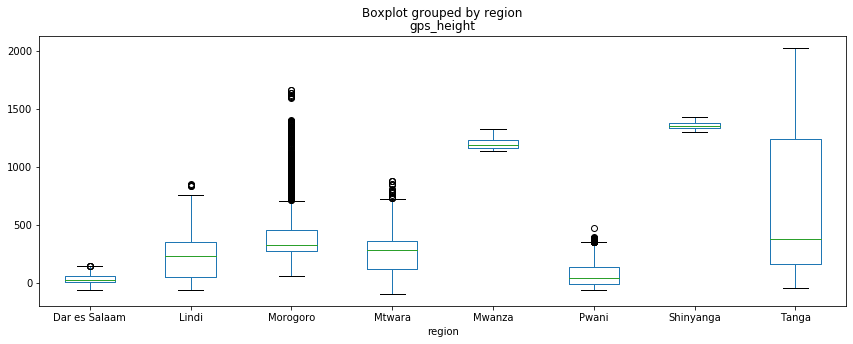

In [41]:
df_non_0_gps_height.boxplot(column='gps_height', by='region',  grid=False, figsize=(14,5))
# as we can see, there is some spread in the data, especially in Morogoro so we will use median as the aggregator to immute

In [42]:
df_non_0_gps_height.groupby('region').median()

,gps_height
region,
Dar es Salaam,28
Lindi,235
Morogoro,332
Mtwara,283
Mwanza,1189
Pwani,48
Shinyanga,1357
Tanga,382


In [43]:
dict_non_0_gps_height_median = df_non_0_gps_height.groupby('region').median().to_dict()
dict_non_0_gps_height_median

{'gps_height': {'Dar es Salaam': 28,
  'Lindi': 235,
  'Morogoro': 332,
  'Mtwara': 283,
  'Mwanza': 1189,
  'Pwani': 48,
  'Shinyanga': 1357,
  'Tanga': 382}}

In [44]:
# loop thru each region and back fill the zero gps height (using median)
for region in regions:
    df.loc[(df['gps_height'] == 0) & (df['region'] == region), 'gps_height'] =\
    get_0_gps_height(dict_non_0_gps_height_median, region)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [45]:
# remaining regions, back fill based on gps_heights found in google
# loop thru each region and back fill the zero gps height
for region in regions:
    df.loc[(df['gps_height'] == 0) & (df['region'] == region), 'gps_height'] =\
    get_0_gps_height(dict_gps_height, region)

In [46]:
df[df['gps_height']==0]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest,construction_year
id,,,,,,,,,,,,,,,,,,,,,


In [47]:
df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest,construction_year
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,1,0,1999
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0,2010
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,1,0,2009
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,1,0,1986
19728,0.0,2011-07-13,Action In A,1300,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,...,enough,river,river/lake,surface,communal standpipe,communal standpipe,n/a,0,1,1988
18990,1000.0,2011-03-21,Hiap,300,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,...,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,n/a,0,1,1994
28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,...,insufficient,dam,dam,surface,communal standpipe,communal standpipe,n/a,0,1,2010


### immute  - amount_tsh
===============================

In [48]:
# almost 70% of the pumps are missing their total static head.
# will try to infer their values based on pump type/class

# in the perfect world, we would be able to calculate this value using the respective discharge/suction elevations 
# but that data is too granualr and not available.
# note: in theory, it is technically possible to have pump circuits at 0 tsh 
# but in this application (potable water in an natural, outdoor setting) it is not practical 
# (too much energy/work would be required to bring the water to the required discharge level)


In [49]:
non_0_tsh = df[['amount_tsh', 'extraction_type_class', 'extraction_type_group', 'extraction_type']][df['amount_tsh'] != 0]

In [50]:
non_0_tsh

,amount_tsh,extraction_type_class,extraction_type_group,extraction_type
id,,,,
69572,6000.0,gravity,gravity,gravity
34310,25.0,gravity,gravity,gravity
9944,20.0,submersible,submersible,submersible
50409,200.0,handpump,swn 80,swn 80
48451,500.0,gravity,gravity,gravity
...,...,...,...,...
45017,1000.0,gravity,gravity,gravity
71252,500.0,handpump,india mark ii,india mark ii
7869,3000.0,gravity,gravity,gravity


In [51]:
# mean tsh by extraction type class (non zero)
non_0_tsh.groupby('extraction_type_class').mean()

,amount_tsh
extraction_type_class,
gravity,1214.321133
handpump,1038.607628
motorpump,1295.854189
other,995.709466
rope pump,789.772727
submersible,754.304630
wind-powered,179.852941


In [52]:
non_0_tsh.groupby('extraction_type_group').mean()

,amount_tsh
extraction_type_group,
afridev,1241.764168
gravity,1214.321133
india mark ii,1432.662602
india mark iii,59.607843
mono,1208.132597
nira/tanira,663.682399
other,995.709466
other handpump,1943.929134
other motorpump,6966.428571


In [53]:
non_0_tsh.groupby('extraction_type').mean()

,amount_tsh
extraction_type,
afridev,1241.764168
cemo,30.000000
climax,7500.000000
gravity,1214.321133
india mark ii,1432.662602
india mark iii,59.607843
ksb,1246.651206
mono,1208.132597
nira/tanira,663.682399


In [54]:
# median tsh by extraction type class (non zero)
non_0_tsh.groupby('extraction_type_class').median()

,amount_tsh
extraction_type_class,
gravity,500.0
handpump,500.0
motorpump,50.0
other,300.0
rope pump,500.0
submersible,50.0
wind-powered,37.5


In [55]:
non_0_tsh.groupby('extraction_type_group').median()

,amount_tsh
extraction_type_group,
afridev,500.0
gravity,500.0
india mark ii,500.0
india mark iii,25.0
mono,50.0
nira/tanira,500.0
other,300.0
other handpump,1000.0
other motorpump,7500.0


In [56]:
non_0_tsh.groupby('extraction_type').median()

,amount_tsh
extraction_type,
afridev,500.0
cemo,30.0
climax,7500.0
gravity,500.0
india mark ii,500.0
india mark iii,25.0
ksb,50.0
mono,50.0
nira/tanira,500.0


In [57]:
# ultimately due to the sensitivity of outliers, we will fill the 0 values with median of [extraction_type]

In [58]:
non_0_tsh_median_by_extraction_type = non_0_tsh.groupby('extraction_type').median().to_dict()
non_0_tsh_median_by_extraction_type

{'amount_tsh': {'afridev': 500.0,
  'cemo': 30.0,
  'climax': 7500.0,
  'gravity': 500.0,
  'india mark ii': 500.0,
  'india mark iii': 25.0,
  'ksb': 50.0,
  'mono': 50.0,
  'nira/tanira': 500.0,
  'other': 300.0,
  'other - play pump': 50.0,
  'other - rope pump': 500.0,
  'other - swn 81': 1000.0,
  'submersible': 50.0,
  'swn 80': 500.0,
  'walimi': 500.0,
  'windmill': 37.5}}

In [59]:
non_0_tsh_median_by_extraction_type['amount_tsh']['cemo']

30.0

In [60]:
list(non_0_tsh_median_by_extraction_type['amount_tsh'].keys())

['afridev',
 'cemo',
 'climax',
 'gravity',
 'india mark ii',
 'india mark iii',
 'ksb',
 'mono',
 'nira/tanira',
 'other',
 'other - play pump',
 'other - rope pump',
 'other - swn 81',
 'submersible',
 'swn 80',
 'walimi',
 'windmill']

In [61]:
non_0_tsh_median_by_extraction_type_group = non_0_tsh.groupby('extraction_type_group').median().to_dict()

In [62]:
# filling in the zero tsh based on the median from the extraction_type
for ext_type in list(non_0_tsh_median_by_extraction_type['amount_tsh'].keys()):
    df.loc[(df['amount_tsh'] == 0) & (df['extraction_type'] == ext_type), 'amount_tsh'] =\
    non_0_tsh_median_by_extraction_type['amount_tsh'][ext_type]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [63]:
# checking that all rows got filled
len(df[df['amount_tsh'] == 0])

2

In [64]:
# filling the 2 rows outliers using [extraction_type_group] since existing [extraction_type] data was not available.

df.loc[(df['amount_tsh'] == 0) & (df['extraction_type'] == 'other - mkulima/shinyanga'), 'amount_tsh'] =\
non_0_tsh_median_by_extraction_type_group['amount_tsh']['other handpump']

In [65]:
# checking that all rows got filled (s/b zero rows)
len(df[df['amount_tsh'] == 0])

0

In [66]:
# there are still 2 pumps remaining with 0 tsh(m)
(df[['amount_tsh', 'extraction_type_class', 'extraction_type_group', 'extraction_type']][df['amount_tsh'] == 0])

,amount_tsh,extraction_type_class,extraction_type_group,extraction_type
id,,,,


### immute  - population
============

In [67]:
# get a list of wards with pop == 0

In [68]:
df[['ward', 'population']][df['population'] == 0].groupby('ward').sum()

,population
ward,
Babayu,0
Badi,0
Badugu,0
Bahi,0
Bangwe,0
...,...
Zanka,0
Ziba,0
Zoissa,0


In [69]:
df[['ward']][df['population'] == 0].groupby('ward').count().index.tolist()

['Babayu',
 'Badi',
 'Badugu',
 'Bahi',
 'Bangwe',
 'Bariadi',
 'Berege',
 'Bereko',
 'Biharamulo Urban',
 'Biirabo',
 'Bonde la Songwe',
 'Bubiki',
 'Buchambi',
 'Budakwa',
 'Budekwa',
 'Budushi',
 'Bugandika',
 'Buganguzi',
 'Bugarama',
 'Bugene',
 'Bugogwe',
 'Bugomora',
 'Bugoro',
 'Bugorora',
 'Buhanda businde',
 'Buhendangabo',
 'Buhingo',
 'Buhongwa',
 'Bujashi',
 'Bujonde',
 'Bujugo',
 'Bukembe',
 'Bukene',
 'Bukiriro',
 'Bukoko',
 'Bukoli',
 'Bukombe',
 'Bukome',
 'Bukondo',
 'Bukumbi',
 'Bukundi',
 'Bukwimba',
 'Bulige',
 'Bulongwa',
 'Bulungwa',
 'Bulyakashaju',
 'Bumbuta',
 'Bumera',
 'Bumilayinga',
 'Bunambiu',
 'Bunamhala',
 'Bungulwa',
 'Bupamwa',
 'Bupandwamhela',
 'Bupigu',
 'Bureza',
 'Burungura',
 'Busanda',
 'Busangi',
 'Buseresere',
 'Busi',
 'Busilili',
 'Busisi',
 'Busole',
 'Busolwa',
 'Busongo',
 'Buswelu',
 'Buterankuzi',
 'Butimba',
 'Buyagu',
 'Buyango',
 'Buziku',
 'Buzilasoga',
 'Bwanga',
 'Bwanjai',
 'Bwera',
 'Bweranyange',
 'Chabutwa',
 'Chalangwa',
 'C

In [70]:
# 2012 census data was collected and prepared externally for all the wards

df_ward_pop_2012 = pd.read_csv('../data/external/ward_population_2012.csv', index_col='ward')
df_ward_pop_2012

,population_2012
ward,
Babayu,10126
Badi,16131
Badugu,13571
Bahi,18293
Bangwe,15453
...,...
Zanka,9886
Ziba,18893
Zoissa,6105


In [71]:
# we need to backfill using the population per pump, per ward. 
# now we get the total number of pumps in the ward (regardless of population zero or non-zero)

df_well_count_by_ward = df[['ward']].groupby('ward').size().to_frame('count')
df_well_count_by_ward

,count
ward,
Aghondi,16
Akheri,47
Arash,12
Arri,20
Arusha Chini,62
...,...
Ziwani,34
Zoissa,22
Zombo,28


In [72]:
df_well_pop_per_well_per_ward = df_ward_pop_2012.merge(df_well_count_by_ward, left_index=True, right_index=True)
df_well_pop_per_well_per_ward

,population_2012,count
ward,,
Babayu,10126,12
Badi,16131,39
Badugu,13571,21
Bahi,18293,20
Bangwe,15453,10
...,...,...
Zanka,9886,21
Ziba,18893,15
Zoissa,6105,22


In [73]:
df_well_pop_per_well_per_ward['pop_per_well_per_ward'] = (df_well_pop_per_well_per_ward['population_2012'] / df_well_pop_per_well_per_ward['count']).values.astype(int)
df_well_pop_per_well_per_ward

,population_2012,count,pop_per_well_per_ward
ward,,,
Babayu,10126,12,843
Badi,16131,39,413
Badugu,13571,21,646
Bahi,18293,20,914
Bangwe,15453,10,1545
...,...,...,...
Zanka,9886,21,470
Ziba,18893,15,1259
Zoissa,6105,22,277


In [74]:
df_well_pop_per_well_per_ward.loc['Fufu']

population_2012          3469
count                       2
pop_per_well_per_ward    1734
Name: Fufu, dtype: int64

In [75]:
dict_well_pop_per_well_per_ward = df_well_pop_per_well_per_ward.to_dict()
dict_well_pop_per_well_per_ward 

{'population_2012': {'Babayu': 10126,
  'Badi': 16131,
  'Badugu': 13571,
  'Bahi': 18293,
  'Bangwe': 15453,
  'Bariadi': 11248,
  'Berege': 10931,
  'Bereko': 7226,
  'Biirabo': 18900,
  'Bonde la Songwe': 18487,
  'Bubiki': 20038,
  'Buchambi': 13520,
  'Budekwa': 13630,
  'Budushi': 6940,
  'Bugandika': 9444,
  'Buganguzi': 10562,
  'Bugarama': 18271,
  'Bugene': 15867,
  'Bugomora': 11144,
  'Bugorora': 6905,
  'Buhendangabo': 7724,
  'Buhingo': 13871,
  'Buhongwa': 26681,
  'Bujashi': 12881,
  'Bujonde': 7528,
  'Bujugo': 7140,
  'Bukene': 7641,
  'Bukiriro': 19875,
  'Bukoko': 15985,
  'Bukoli': 16345,
  'Bukombe': 11706,
  'Bukome': 16933,
  'Bukondo': 13371,
  'Bukumbi': 26368,
  'Bukundi': 10759,
  'Bukwimba': 17335,
  'Bulige': 10505,
  'Bulongwa': 3824,
  'Bulungwa': 24642,
  'Bulyakashaju': 9951,
  'Bumbuta': 8602,
  'Bumera': 9601,
  'Bumilayinga': 6136,
  'Bunamhala': 28301,
  'Bungulwa': 10361,
  'Bupamwa': 17366,
  'Bupigu': 6145,
  'Bureza': 7472,
  'Burungura': 13354

In [76]:
wards_2012 = df_ward_pop_2012.index.values
wards_2012

array(['Babayu', 'Badi', 'Badugu', 'Bahi', 'Bangwe', 'Bariadi', 'Berege',
       'Bereko', 'Biirabo', 'Bonde la Songwe', 'Bubiki', 'Buchambi',
       'Budekwa', 'Budushi', 'Bugandika', 'Buganguzi', 'Bugarama',
       'Bugene', 'Bugomora', 'Bugorora', 'Buhendangabo', 'Buhingo',
       'Buhongwa', 'Bujashi', 'Bujonde', 'Bujugo', 'Bukene', 'Bukiriro',
       'Bukoko', 'Bukoli', 'Bukombe', 'Bukome', 'Bukondo', 'Bukumbi',
       'Bukundi', 'Bukwimba', 'Bulige', 'Bulongwa', 'Bulungwa',
       'Bulyakashaju', 'Bumbuta', 'Bumera', 'Bumilayinga', 'Bunamhala',
       'Bungulwa', 'Bupamwa', 'Bupigu', 'Bureza', 'Burungura', 'Busanda',
       'Busangi', 'Buseresere', 'Busi', 'Busilili', 'Busisi', 'Busolwa',
       'Busongo', 'Buswelu', 'Butimba', 'Buyagu', 'Buyango', 'Buziku',
       'Buzilasoga', 'Bwanga', 'Bwanjai', 'Bwera', 'Bweranyange',
       'Chabutwa', 'Chalangwa', 'Chali', 'Chambo', 'Chamkoroma',
       'Chandama', 'Changaa', 'Chato', 'Chela', 'Chemba', 'Chemchem',
       'Chibe', 'Chibele

In [77]:
df[(df['population'] == 0)]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest,construction_year
id,,,,,,,,,,,,,,,,,,,,,
19728,500.0,2011-07-13,Action In A,1300,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0,2002
19816,500.0,2012-10-01,Dwsp,1158,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,...,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,1,0,1994
54551,500.0,2012-10-09,Rwssp,1158,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,...,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,1,0,1996
53934,500.0,2012-11-03,Wateraid,1200,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,...,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,1,0,1997
46144,500.0,2011-08-03,Isingiro Ho,1300,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,...,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,1,0,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58693,500.0,2013-01-25,Rwssp,1158,DWE,32.442886,-3.644662,Busangi,0,Lake Tanganyika,...,enough,shallow well,shallow well,groundwater,hand pump,hand pump,n/a,0,1,2003
7869,3000.0,2011-03-11,Kkkt,2046,Commu,34.345525,-9.547077,none,0,Lake Nyasa,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,n/a,0,1,1986
59757,500.0,2013-02-24,Villagers,1291,Villagers,35.345384,-9.831170,Kwa Reonard,0,Lake Nyasa,...,enough,river,river/lake,surface,communal standpipe,communal standpipe,n/a,0,1,2009


In [78]:
# testing
dict_well_pop_per_well_per_ward['pop_per_well_per_ward']['Fufu']

1734

In [79]:
# back fill the missing population for each ward via lookup:

for ward in wards_2012:
    df.loc[(df['population'] == 0) & (df['ward'] == ward), 'population'] =\
    dict_well_pop_per_well_per_ward['pop_per_well_per_ward'][ward]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [80]:
# spot check
df['population'][(df['ward'] == 'Fufu')]

id
20856    1734
42912    1734
Name: population, dtype: int64

### for the remaining wards with zero population, fill using the region population, per pump

In [81]:
df['region'][df['population']==0].value_counts()

Mbeya        395
Shinyanga    366
Kagera       271
Mwanza       240
Tabora       193
Iringa       161
Dodoma       106
Kigoma        13
Ruvuma         8
Name: region, dtype: int64

In [82]:
df[(df['population'] == 0)]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest,construction_year
id,,,,,,,,,,,,,,,,,,,,,
67359,500.0,2011-07-16,Danida,1700,Central government,33.854345,-9.638520,Office Ya Kijiji,0,Lake Nyasa,...,dry,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,1,0,2000
19415,500.0,2011-03-02,Roman,2328,Commu,34.284476,-9.271565,none,0,Lake Nyasa,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,1,0,2002
68717,500.0,2011-08-08,Swedish,1140,Sengerema Water Department,32.185517,-2.378772,Kwa Swakala,0,Lake Victoria,...,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,1,0,1998
7116,300.0,2011-07-12,NaN,1700,NaN,33.805081,-9.130674,Kwa Mzee Kaiga,0,Lake Nyasa,...,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,1,0,1990
49585,500.0,2011-10-07,Sida,1700,Central government,33.860845,-9.596084,Kwa Mwabibi Mstafa,0,Lake Nyasa,...,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional,1,0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42919,50.0,2011-07-30,Kashwas,1140,KASHWA,32.804272,-3.164786,Kwa Wach,0,Lake Victoria,...,enough,lake,river/lake,surface,communal standpipe multiple,communal standpipe,n/a,0,1,1973
7181,500.0,2011-07-19,Danida,1700,Central government,33.883361,-9.587648,Kwa Daudi Mwakinyuke,0,Lake Nyasa,...,dry,spring,spring,groundwater,communal standpipe,communal standpipe,n/a,0,1,2000
54127,500.0,2011-03-23,Kkkt,2114,Commu,34.016214,-9.338779,none,0,Lake Nyasa,...,dry,spring,spring,groundwater,communal standpipe,communal standpipe,n/a,0,1,2003


In [83]:
#via census/google

dict_region_pop_2012 = {
    'Mbeya':2707410,        
    'Shinyanga':1534808,
    'Kagera':2458023,
    'Mwanza':2772509,
    'Tabora':2291623,
    'Iringa':941238,
    'Dodoma':2083588,
    'Kigoma':2127930,
    'Ruvuma':1376891,
    'Singida':1370637
}

In [84]:
df_region_pop_2012 = pd.DataFrame(list(dict_region_pop_2012.values()), 
                                  index=dict_region_pop_2012.keys(), 
                                  columns=['population_2012'])
df_region_pop_2012

,population_2012
Mbeya,2707410
Shinyanga,1534808
Kagera,2458023
Mwanza,2772509
Tabora,2291623
Iringa,941238
Dodoma,2083588
Kigoma,2127930
Ruvuma,1376891
Singida,1370637


In [85]:
df[['region','population']][df['population']!=0].groupby('region').sum()

,population
region,
Arusha,1020063
Dar es Salaam,241555
Dodoma,1300676
Iringa,862771
Kagera,1816782
Kigoma,1574190
Kilimanjaro,541779
Lindi,669812
Manyara,583877


In [86]:
df[['region','population']][df['population']!=0].groupby('region').count()

,population
region,
Arusha,3936
Dar es Salaam,1017
Dodoma,2464
Iringa,6315
Kagera,3599
Kigoma,2917
Kilimanjaro,5172
Lindi,1827
Manyara,1876


In [87]:
df[['region','population']][df['population']==0].groupby('region').count()

,population
region,
Dodoma,106
Iringa,161
Kagera,271
Kigoma,13
Mbeya,395
Mwanza,240
Ruvuma,8
Shinyanga,366
Tabora,193


In [88]:
# for the remaining wards with zero population:
# we will take the avg population per region and divide by the number of wells for that region.

df_mean_pop_by_region = df[['region','population']][df['population']!=0].groupby('region').mean().round().astype(int)
df_mean_pop_by_region

,population
region,
Arusha,259
Dar es Salaam,238
Dodoma,528
Iringa,137
Kagera,505
Kigoma,540
Kilimanjaro,105
Lindi,367
Manyara,311


In [89]:
df_mean_pop_by_region.sum()

population    7624
dtype: int64

In [90]:
df_mean_pop_by_region.loc['Mbeya']['population']

313

In [91]:
list(df_region_pop_2012.index.values)

['Mbeya',
 'Shinyanga',
 'Kagera',
 'Mwanza',
 'Tabora',
 'Iringa',
 'Dodoma',
 'Kigoma',
 'Ruvuma',
 'Singida']

In [92]:
# fill the remaining populations

for region in list(df_region_pop_2012.index.values):
    df.loc[(df['population'] == 0) & (df['region'] == region), 'population'] =\
    df_mean_pop_by_region.loc[region]['population']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [93]:
df[(df['population'] == 0)]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest,construction_year
id,,,,,,,,,,,,,,,,,,,,,


## 0A: New Features
==========================

In [94]:
from datetime import date

In [95]:
# the contest launched in Feb 2015.... we will use that as the 'origin year'
# https://community.drivendata.org/t/about-the-pump-it-up-data-mining-the-water-table-category/63
    
year_origin = 2015

### pump_age_yr
a quick and easy to read feature that tells us how old the pump is in years (rounds down)

In [96]:
df['pump_age_yr'] = year_origin - df['construction_year']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### date_recorded_age_yr
a quick and easy to read feature that tells us how old data recording of the pump is in years (rounds down)

In [97]:
df['date_recorded_age_yr'] = year_origin - df['date_recorded'].str[0:4].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,is_train,is_contest,construction_year,pump_age_yr,date_recorded_age_yr
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,spring,groundwater,communal standpipe,communal standpipe,functional,1,0,1999,16,4
8776,500.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0,2010,5,2
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,dam,surface,communal standpipe multiple,communal standpipe,functional,1,0,2009,6,2
67743,50.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,1,0,1986,29,2
19728,500.0,2011-07-13,Action In A,1300,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0,2002,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,50.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,...,river/lake,surface,communal standpipe,communal standpipe,n/a,0,1,1988,27,4
18990,1000.0,2011-03-21,Hiap,300,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,...,shallow well,groundwater,hand pump,hand pump,n/a,0,1,1994,21,4
28749,500.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,...,dam,surface,communal standpipe,communal standpipe,n/a,0,1,2010,5,2


# ^^^^^^^ qualitative features

In [99]:
# change the nan's to "unknown" to be consistent with  the features that already have unknowns

In [100]:
# https://www.datacamp.com/community/tutorials/categorical-data

# Many machine learning models, such as regression or SVM, are algebraic. 
# This means that their input must be numerical. 
# To use these models, categories must be transformed into numbers first, before you can apply the learning algorithm on them.

## 0B: remove non-predictive columns

In [101]:
# remove the date_recorded from the ML dataframe as the new features will be used instead for time dependencies
df.drop(columns=['date_recorded', 'recorded_by'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## 1) fillna (nan) w/ "unknown"
- these 7 cols have nans and need to be filled (obtained via Part 1):

In [102]:
cols_fill_na_w_unknown = [
    'public_meeting',
    'permit',
    'scheme_management',
    'funder',
    'installer',
    'scheme_name',
    'subvillage'    
]

for col in cols_fill_na_w_unknown:
    df[col].fillna(value='unknown', inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [103]:
df['public_meeting'][df['public_meeting'] == 'unknown']

id
8776     unknown
6091     unknown
24593    unknown
35715    unknown
30423    unknown
          ...   
57344    unknown
53708    unknown
32944    unknown
19620    unknown
64579    unknown
Name: public_meeting, Length: 3999, dtype: object

## 2) removing duplicates / excessive features
some features have up to 3 levels of delination. for feature engineering we will remove the "higher" levels and keep the lowest level (the level that has the most detail)

In [104]:
len(df.columns)

42

### these features have 2 levels of duplication to be removed

In [105]:
# remove [extraction_type] and [extraction_type_class]
# because there is a  lower level (more granular) feature available: [extraction_type_group]
df.drop(columns=['extraction_type', 'extraction_type_class'], axis=1, inplace=True, errors='ignore')

In [106]:
# remove [source_type] and [source_class]
# because there is a  lower level (more granular) feature available: [source]
df.drop(columns=['source_type', 'source_class'], axis=1, inplace=True, errors='ignore')

### these features have 1 level of duplication to be removed

In [107]:
# remove: [quantity_group] 5, 
# keep: ['quantity'] 5 

# exact duplicates
df.drop(columns=['quantity_group'], axis=1, inplace=True, errors='ignore')

In [108]:
# remove: [waterpoint_type_group] 6 
# keep: ['waterpoint_type'] 7
df.drop(columns=['waterpoint_type_group'], axis=1, inplace=True, errors='ignore')

In [109]:
# remove: [management_group] 5, 
# keep: [management] 12
df.drop(columns=['management_group'], axis=1, inplace=True, errors='ignore')

In [110]:
# remove: [scheme_name] ~2700, 
# keep: [scheme_management] 13

# this is special because it is 
# essentially this is a frequency based binning to reduce the number of one-hot encoded features.
df.drop(columns=['scheme_name'], axis=1, inplace=True, errors='ignore')

In [111]:
len(df.columns)

34

# 3) High Cardinality (too many columns to use one hot)
# columns: lga, funder, ward, installer, subvillage
# maybe: wpt_name

- 'lga' (125)
- funder (~1900)
- 'ward' (~2100)
- installer (~2150)
- subvillage (~19300)
- wpt_name (~37400)

all have large amount of unique categories
also have nans --> do we make them "unknown"?

can we just simply exclude some of them (i.e. wpt_name) given that it is unlikely to impact predictive modelling?

https://kiwidamien.github.io/are-you-getting-burned-by-one-hot-encoding.html

https://towardsdatascience.com/feature-engineering-deep-dive-into-encoding-and-binning-techniques-5618d55a6b38

https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

In [112]:
# for now i'm going to delete them until i can find a better way to deal with it
# i.e. some sort of encoding (other than one-hot)
# maybe frequency encoding

df_hold = df[
    [
        'lga',
        'funder',
        'ward',
        'installer',
        'subvillage',
        'wpt_name',
        'is_train',
        'is_contest'
    ]
]
df_hold

,lga,funder,ward,installer,subvillage,wpt_name,is_train,is_contest
id,,,,,,,,
69572,Ludewa,Roman,Mundindi,Roman,Mnyusi B,none,1,0
8776,Serengeti,Grumeti,Natta,GRUMETI,Nyamara,Zahanati,1,0
34310,Simanjiro,Lottery Club,Ngorika,World vision,Majengo,Kwa Mahundi,1,0
67743,Nanyumbu,Unicef,Nanyumbu,UNICEF,Mahakamani,Zahanati Ya Nanyumbu,1,0
19728,Karagwe,Action In A,Nyakasimbi,Artisan,Kyanyamisa,Shuleni,1,0
...,...,...,...,...,...,...,...,...
39307,Bagamoyo,Danida,Yombo,Da,Yombo,Kwambwezi,0,1
18990,Kilindi,Hiap,Mvungwe,HIAP,Mkondoa,Bonde La Mkondoa,0,1
28749,Singida Rural,unknown,Ughandi,unknown,Juhudi,Bwawani,0,1


df.drop(columns = ['lga','funder','ward','installer','subvillage','wpt_name'],
        axis=1,
        inplace=True,
        errors='ignore')

In [113]:
# add 
freq_cols = ['lga','funder','ward','installer','subvillage','wpt_name']

# make a new dataframe with only the desired col's for machine learning
df2 = df.copy()

for freq_col in freq_cols:
    df2_frequency = df2.groupby(freq_col).size()/len(df2)
    df2.loc[:,freq_col+'_freq_encode'] = df2[freq_col].map(df2_frequency)

df2.drop(columns=freq_cols, axis=1, inplace=True)
df2

,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,population,...,is_contest,construction_year,pump_age_yr,date_recorded_age_yr,lga_freq_encode,funder_freq_encode,ward_freq_encode,installer_freq_encode,subvillage_freq_encode,wpt_name_freq_encode
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,5,109,...,0,1999,16,4,0.009666,0.004676,0.000572,0.001602,0.000086,0.062403
8776,500.0,1399,34.698766,-2.147466,0,Lake Victoria,Mara,20,2,280,...,0,2010,5,2,0.012555,0.000915,0.001244,0.000715,0.000086,0.013670
34310,25.0,686,37.460664,-3.821329,0,Pangani,Manyara,21,4,250,...,0,2009,6,2,0.005248,0.000129,0.000186,0.006621,0.008508,0.000043
67743,50.0,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,63,58,...,0,1986,29,2,0.003046,0.017517,0.000586,0.003947,0.000315,0.000029
19728,500.0,1300,31.130847,-1.825359,0,Lake Victoria,Kagera,18,1,914,...,0,2002,13,4,0.013184,0.000014,0.000200,0.002331,0.000029,0.029171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,50.0,34,38.852669,-6.582841,0,Wami / Ruvu,Pwani,6,1,20,...,1,1988,27,4,0.018032,0.053594,0.001916,0.004104,0.000143,0.000014
18990,1000.0,300,37.451633,-5.350428,0,Pangani,Tanga,4,7,2960,...,1,1994,21,4,0.003003,0.000100,0.000615,0.000100,0.000100,0.000014
28749,500.0,1476,34.739804,-4.585587,0,Internal,Singida,13,2,200,...,1,2010,5,2,0.016301,0.058156,0.000658,0.058527,0.000458,0.001144


In [114]:
# https://stackoverflow.com/questions/47418299/python-combining-low-frequency-factors-category-counts

# apply this idea where you take the lower frequency (based on some cutoff) and turn those into "unknown" meanwhile keep the rest as is.

# 4) Encode: One - Hot Encode
These remaining columns have up to 25 unique values each.

We will use One-Hot Encoding to prepare these features for machine learning model development

### potential nominal columns (no order) -- one hot encoder -- <25 unique count

- 'basin', 'region', 
- 'public_meeting', 'recorded_by', 'scheme_management',  'permit', 
       
- 'extraction_type', 'extraction_type_group', 'extraction_type_class', 
- 'management','management_group', 
- 'payment', 'payment_type', 
  
- 'source', 'source_type', 'source_class', 
- 'waterpoint_type', 'waterpoint_type_group'

- 'water_quality', 'quality_group', 'quantity', 'quantity_group', <-- if time, convert these to ordered/ordinal

In [115]:
keep_cols = [
    'amount_tsh', 'gps_height', 'longitude', 'latitude',
    'num_private',
    'population', 'construction_year', 

    'status_group', 'is_train', 'is_contest']

In [116]:
one_hot_encode_cols = [
    'basin', 
    'region',
    'region_code',
    'district_code', 
    'public_meeting', 
    'scheme_management',
    'permit',  
    'extraction_type_group', 
    'management',
    'payment', 'payment_type', 
    'water_quality', 
    'quality_group', 
    'quantity',
    'source', 
    'waterpoint_type'
]

In [117]:
df3 = pd.get_dummies(df, prefix=one_hot_encode_cols, columns=one_hot_encode_cols)
df3

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,subvillage,lga,...,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Mnyusi B,Ludewa,...,0,1,0,0,1,0,0,0,0,0
8776,500.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Nyamara,Serengeti,...,0,0,0,0,1,0,0,0,0,0
34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Majengo,Simanjiro,...,0,0,0,0,0,1,0,0,0,0
67743,50.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Mahakamani,Nanyumbu,...,0,0,0,0,0,1,0,0,0,0
19728,500.0,Action In A,1300,Artisan,31.130847,-1.825359,Shuleni,0,Kyanyamisa,Karagwe,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,50.0,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Yombo,Bagamoyo,...,0,0,0,0,1,0,0,0,0,0
18990,1000.0,Hiap,300,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Mkondoa,Kilindi,...,1,0,0,0,0,0,0,1,0,0
28749,500.0,unknown,1476,unknown,34.739804,-4.585587,Bwawani,0,Juhudi,Singida Rural,...,0,0,0,0,1,0,0,0,0,0


In [118]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df3.columns.values)

['amount_tsh' 'funder' 'gps_height' 'installer' 'longitude' 'latitude'
 'wpt_name' 'num_private' 'subvillage' 'lga' 'ward' 'population'
 'status_group' 'is_train' 'is_contest' 'construction_year' 'pump_age_yr'
 'date_recorded_age_yr' 'basin_Internal' 'basin_Lake Nyasa'
 'basin_Lake Rukwa' 'basin_Lake Tanganyika' 'basin_Lake Victoria'
 'basin_Pangani' 'basin_Rufiji' 'basin_Ruvuma / Southern Coast'
 'basin_Wami / Ruvu' 'region_Arusha' 'region_Dar es Salaam'
 'region_Dodoma' 'region_Iringa' 'region_Kagera' 'region_Kigoma'
 'region_Kilimanjaro' 'region_Lindi' 'region_Manyara' 'region_Mara'
 'region_Mbeya' 'region_Morogoro' 'region_Mtwara' 'region_Mwanza'
 'region_Pwani' 'region_Rukwa' 'region_Ruvuma' 'region_Shinyanga'
 'region_Singida' 'region_Tabora' 'region_Tanga' 'region_code_1'
 'region_code_2' 'region_code_3' 'region_code_4' 'region_code_5'
 'region_code_6' 'region_code_7' 'region_code_8' 'region_code_9'
 'region_code_10' 'region_code_11' 'region_code_12' 'region_code_13'
 'region_co

In [119]:
df2.drop(columns=one_hot_encode_cols, axis=1, inplace=True)
df2

,amount_tsh,gps_height,longitude,latitude,num_private,population,status_group,is_train,is_contest,construction_year,pump_age_yr,date_recorded_age_yr,lga_freq_encode,funder_freq_encode,ward_freq_encode,installer_freq_encode,subvillage_freq_encode,wpt_name_freq_encode
id,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,109,functional,1,0,1999,16,4,0.009666,0.004676,0.000572,0.001602,0.000086,0.062403
8776,500.0,1399,34.698766,-2.147466,0,280,functional,1,0,2010,5,2,0.012555,0.000915,0.001244,0.000715,0.000086,0.013670
34310,25.0,686,37.460664,-3.821329,0,250,functional,1,0,2009,6,2,0.005248,0.000129,0.000186,0.006621,0.008508,0.000043
67743,50.0,263,38.486161,-11.155298,0,58,non functional,1,0,1986,29,2,0.003046,0.017517,0.000586,0.003947,0.000315,0.000029
19728,500.0,1300,31.130847,-1.825359,0,914,functional,1,0,2002,13,4,0.013184,0.000014,0.000200,0.002331,0.000029,0.029171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,50.0,34,38.852669,-6.582841,0,20,n/a,0,1,1988,27,4,0.018032,0.053594,0.001916,0.004104,0.000143,0.000014
18990,1000.0,300,37.451633,-5.350428,0,2960,n/a,0,1,1994,21,4,0.003003,0.000100,0.000615,0.000100,0.000100,0.000014
28749,500.0,1476,34.739804,-4.585587,0,200,n/a,0,1,2010,5,2,0.016301,0.058156,0.000658,0.058527,0.000458,0.001144


In [120]:
df2.drop(columns=keep_cols, axis=1, inplace=True)
df2

,pump_age_yr,date_recorded_age_yr,lga_freq_encode,funder_freq_encode,ward_freq_encode,installer_freq_encode,subvillage_freq_encode,wpt_name_freq_encode
id,,,,,,,,
69572,16,4,0.009666,0.004676,0.000572,0.001602,0.000086,0.062403
8776,5,2,0.012555,0.000915,0.001244,0.000715,0.000086,0.013670
34310,6,2,0.005248,0.000129,0.000186,0.006621,0.008508,0.000043
67743,29,2,0.003046,0.017517,0.000586,0.003947,0.000315,0.000029
19728,13,4,0.013184,0.000014,0.000200,0.002331,0.000029,0.029171
...,...,...,...,...,...,...,...,...
39307,27,4,0.018032,0.053594,0.001916,0.004104,0.000143,0.000014
18990,21,4,0.003003,0.000100,0.000615,0.000100,0.000100,0.000014
28749,5,2,0.016301,0.058156,0.000658,0.058527,0.000458,0.001144


In [121]:
df3.drop(columns=freq_cols, axis=1, inplace=True)
df3.drop(columns=['pump_age_yr', 'date_recorded_age_yr'], axis=1, inplace=True) #drop here bc df2 already has
df3

,amount_tsh,gps_height,longitude,latitude,num_private,population,status_group,is_train,is_contest,construction_year,...,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,109,functional,1,0,1999,...,0,1,0,0,1,0,0,0,0,0
8776,500.0,1399,34.698766,-2.147466,0,280,functional,1,0,2010,...,0,0,0,0,1,0,0,0,0,0
34310,25.0,686,37.460664,-3.821329,0,250,functional,1,0,2009,...,0,0,0,0,0,1,0,0,0,0
67743,50.0,263,38.486161,-11.155298,0,58,non functional,1,0,1986,...,0,0,0,0,0,1,0,0,0,0
19728,500.0,1300,31.130847,-1.825359,0,914,functional,1,0,2002,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,50.0,34,38.852669,-6.582841,0,20,n/a,0,1,1988,...,0,0,0,0,1,0,0,0,0,0
18990,1000.0,300,37.451633,-5.350428,0,2960,n/a,0,1,1994,...,1,0,0,0,0,0,0,1,0,0
28749,500.0,1476,34.739804,-4.585587,0,200,n/a,0,1,2010,...,0,0,0,0,1,0,0,0,0,0


In [122]:
#combine df2 and df3 

# df_final = pd.concat([df3, df2], axis=1)
df_final = df3.join(df2)
df_final


,amount_tsh,gps_height,longitude,latitude,num_private,population,status_group,is_train,is_contest,construction_year,...,waterpoint_type_improved spring,waterpoint_type_other,pump_age_yr,date_recorded_age_yr,lga_freq_encode,funder_freq_encode,ward_freq_encode,installer_freq_encode,subvillage_freq_encode,wpt_name_freq_encode
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,109,functional,1,0,1999,...,0,0,16,4,0.009666,0.004676,0.000572,0.001602,0.000086,0.062403
8776,500.0,1399,34.698766,-2.147466,0,280,functional,1,0,2010,...,0,0,5,2,0.012555,0.000915,0.001244,0.000715,0.000086,0.013670
34310,25.0,686,37.460664,-3.821329,0,250,functional,1,0,2009,...,0,0,6,2,0.005248,0.000129,0.000186,0.006621,0.008508,0.000043
67743,50.0,263,38.486161,-11.155298,0,58,non functional,1,0,1986,...,0,0,29,2,0.003046,0.017517,0.000586,0.003947,0.000315,0.000029
19728,500.0,1300,31.130847,-1.825359,0,914,functional,1,0,2002,...,0,0,13,4,0.013184,0.000014,0.000200,0.002331,0.000029,0.029171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,50.0,34,38.852669,-6.582841,0,20,n/a,0,1,1988,...,0,0,27,4,0.018032,0.053594,0.001916,0.004104,0.000143,0.000014
18990,1000.0,300,37.451633,-5.350428,0,2960,n/a,0,1,1994,...,0,0,21,4,0.003003,0.000100,0.000615,0.000100,0.000100,0.000014
28749,500.0,1476,34.739804,-4.585587,0,200,n/a,0,1,2010,...,0,0,5,2,0.016301,0.058156,0.000658,0.058527,0.000458,0.001144


# output cleaned files for modelling
===================================================

In [123]:
# output files to the interim folder... to be used for the next workbook (modeling)

# training data
# training label
# test aka contest data

In [124]:
cols_to_order = ['status_group','is_train','is_contest']
new_columns = (df_final.columns.drop(cols_to_order).tolist()) + cols_to_order
df_final = df_final[new_columns]
df_final

,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,...,date_recorded_age_yr,lga_freq_encode,funder_freq_encode,ward_freq_encode,installer_freq_encode,subvillage_freq_encode,wpt_name_freq_encode,status_group,is_train,is_contest
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,109,1999,0,1,0,...,4,0.009666,0.004676,0.000572,0.001602,0.000086,0.062403,functional,1,0
8776,500.0,1399,34.698766,-2.147466,0,280,2010,0,0,0,...,2,0.012555,0.000915,0.001244,0.000715,0.000086,0.013670,functional,1,0
34310,25.0,686,37.460664,-3.821329,0,250,2009,0,0,0,...,2,0.005248,0.000129,0.000186,0.006621,0.008508,0.000043,functional,1,0
67743,50.0,263,38.486161,-11.155298,0,58,1986,0,0,0,...,2,0.003046,0.017517,0.000586,0.003947,0.000315,0.000029,non functional,1,0
19728,500.0,1300,31.130847,-1.825359,0,914,2002,0,0,0,...,4,0.013184,0.000014,0.000200,0.002331,0.000029,0.029171,functional,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,50.0,34,38.852669,-6.582841,0,20,1988,0,0,0,...,4,0.018032,0.053594,0.001916,0.004104,0.000143,0.000014,n/a,0,1
18990,1000.0,300,37.451633,-5.350428,0,2960,1994,0,0,0,...,4,0.003003,0.000100,0.000615,0.000100,0.000100,0.000014,n/a,0,1
28749,500.0,1476,34.739804,-4.585587,0,200,2010,1,0,0,...,2,0.016301,0.058156,0.000658,0.058527,0.000458,0.001144,n/a,0,1


In [125]:
df_train = df_final[df['is_train']==1].copy()
df_train.drop(columns=['is_train', 'is_contest'], axis=1, inplace=True)
df_train


,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,...,waterpoint_type_other,pump_age_yr,date_recorded_age_yr,lga_freq_encode,funder_freq_encode,ward_freq_encode,installer_freq_encode,subvillage_freq_encode,wpt_name_freq_encode,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,109,1999,0,1,0,...,0,16,4,0.009666,0.004676,0.000572,0.001602,0.000086,0.062403,functional
8776,500.0,1399,34.698766,-2.147466,0,280,2010,0,0,0,...,0,5,2,0.012555,0.000915,0.001244,0.000715,0.000086,0.013670,functional
34310,25.0,686,37.460664,-3.821329,0,250,2009,0,0,0,...,0,6,2,0.005248,0.000129,0.000186,0.006621,0.008508,0.000043,functional
67743,50.0,263,38.486161,-11.155298,0,58,1986,0,0,0,...,0,29,2,0.003046,0.017517,0.000586,0.003947,0.000315,0.000029,non functional
19728,500.0,1300,31.130847,-1.825359,0,914,2002,0,0,0,...,0,13,4,0.013184,0.000014,0.000200,0.002331,0.000029,0.029171,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,1210,37.169807,-3.253847,0,125,1999,0,0,0,...,0,16,2,0.011096,0.010925,0.002145,0.010925,0.000057,0.000014,functional
27263,4700.0,1212,35.249991,-9.070629,0,56,1996,0,0,0,...,0,19,4,0.043384,0.000443,0.000944,0.000229,0.000243,0.000014,functional
37057,500.0,1700,34.017087,-8.750434,0,200,1994,0,0,0,...,0,21,4,0.009252,0.058156,0.001187,0.058527,0.000029,0.000257,functional


In [126]:
df_train.to_csv('../data/interim/df_train.csv')

In [127]:
df_contest = df_final[df['is_contest']==1].copy()
df_contest.drop(columns=['is_train', 'is_contest'], axis=1, inplace=True)
df_contest

,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,...,waterpoint_type_other,pump_age_yr,date_recorded_age_yr,lga_freq_encode,funder_freq_encode,ward_freq_encode,installer_freq_encode,subvillage_freq_encode,wpt_name_freq_encode,status_group
id,,,,,,,,,,,,,,,,,,,,,
50785,300.0,1996,35.290799,-4.059696,0,321,2012,1,0,0,...,1,3,2,0.005362,0.003289,0.000357,0.001616,0.000100,0.000014,n/a
51630,500.0,1569,36.656709,-3.309214,0,300,2000,0,0,0,...,0,15,2,0.021063,0.151545,0.001230,0.287833,0.000014,0.000014,n/a
17168,300.0,1567,34.767863,-5.004344,0,500,2010,1,0,0,...,1,5,2,0.016301,0.058156,0.000701,0.058527,0.000043,0.000029,n/a
45559,300.0,267,38.058046,-9.418672,0,250,1987,0,0,0,...,1,28,2,0.002888,0.000586,0.000100,0.000586,0.000100,0.000014,n/a
49871,500.0,1260,35.006123,-10.950412,0,60,2000,0,0,0,...,0,15,2,0.012669,0.000343,0.000972,0.000343,0.000071,0.000057,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,50.0,34,38.852669,-6.582841,0,20,1988,0,0,0,...,0,27,4,0.018032,0.053594,0.001916,0.004104,0.000143,0.000014,n/a
18990,1000.0,300,37.451633,-5.350428,0,2960,1994,0,0,0,...,0,21,4,0.003003,0.000100,0.000615,0.000100,0.000100,0.000014,n/a
28749,500.0,1476,34.739804,-4.585587,0,200,2010,1,0,0,...,0,5,2,0.016301,0.058156,0.000658,0.058527,0.000458,0.001144,n/a


In [128]:
df_contest.to_csv('../data/interim/df_contest.csv')

# 5) Use Factorize on all Categorical Columns (Instead of 3 & 4)
- idea here is to create a 2nd set of X test values where all categorical columns get 'factorized'
- will compare model performance between factorize vs. one-hot

In [129]:
df5=df.copy()

In [130]:
df5.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'permit',
       'extraction_type_group', 'management', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'source',
       'waterpoint_type', 'status_group', 'is_train', 'is_contest',
       'construction_year', 'pump_age_yr', 'date_recorded_age_yr'],
      dtype='object')

In [131]:
cols_factorize = [
    'funder', 'installer', 'wpt_name',
    'basin', 'subvillage', 'region',
    'lga', 'ward', 
    'scheme_management', 'permit', 
    'extraction_type_group', 'management',
    'payment', 'payment_type',
    'water_quality', 'quality_group', 'quantity',
    'source', 'waterpoint_type',
    'public_meeting'
]

In [132]:
for col_fact in cols_factorize:
    df5[col_fact + '_factorize'] = pd.factorize(df5[col_fact])[0]
    df5.drop(columns=col_fact, axis=1, inplace=True)

In [133]:
df5[df5.columns[:10]]

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,status_group,is_train
id,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,functional,1
8776,500.0,1399,34.698766,-2.147466,0,20,2,280,functional,1
34310,25.0,686,37.460664,-3.821329,0,21,4,250,functional,1
67743,50.0,263,38.486161,-11.155298,0,90,63,58,non functional,1
19728,500.0,1300,31.130847,-1.825359,0,18,1,914,functional,1
...,...,...,...,...,...,...,...,...,...,...
39307,50.0,34,38.852669,-6.582841,0,6,1,20,n/a,0
18990,1000.0,300,37.451633,-5.350428,0,4,7,2960,n/a,0
28749,500.0,1476,34.739804,-4.585587,0,13,2,200,n/a,0


In [134]:
df5[df5.columns[14:]]

,funder_factorize,installer_factorize,wpt_name_factorize,basin_factorize,subvillage_factorize,region_factorize,lga_factorize,ward_factorize,scheme_management_factorize,permit_factorize,extraction_type_group_factorize,management_factorize,payment_factorize,payment_type_factorize,water_quality_factorize,quality_group_factorize,quantity_factorize,source_factorize,waterpoint_type_factorize,public_meeting_factorize
id,,,,,,,,,,,,,,,,,,,,
69572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8776,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,0,1
34310,2,2,2,2,2,2,2,2,0,1,0,0,2,2,0,0,0,2,1,0
67743,3,3,3,3,3,3,3,3,0,1,1,0,1,1,0,0,2,3,1,0
19728,4,4,4,1,4,4,4,4,2,1,0,2,1,1,0,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,11,295,43383,6,1707,8,22,527,0,1,6,0,1,1,0,0,0,6,0,0
18990,683,711,43384,2,1919,5,121,1722,0,0,3,0,0,0,1,1,1,5,2,0
28749,25,19,1336,4,3485,17,31,862,0,2,0,0,1,1,0,0,1,2,0,0


In [135]:
# re order the columns
cols_to_order = ['status_group','is_train','is_contest']
new_columns = (df5.columns.drop(cols_to_order).tolist()) + cols_to_order
df_final_factor = df5[new_columns]
df_final_factor

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,pump_age_yr,...,payment_type_factorize,water_quality_factorize,quality_group_factorize,quantity_factorize,source_factorize,waterpoint_type_factorize,public_meeting_factorize,status_group,is_train,is_contest
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,16,...,0,0,0,0,0,0,0,functional,1,0
8776,500.0,1399,34.698766,-2.147466,0,20,2,280,2010,5,...,1,0,0,1,1,0,1,functional,1,0
34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,6,...,2,0,0,0,2,1,0,functional,1,0
67743,50.0,263,38.486161,-11.155298,0,90,63,58,1986,29,...,1,0,0,2,3,1,0,non functional,1,0
19728,500.0,1300,31.130847,-1.825359,0,18,1,914,2002,13,...,1,0,0,3,1,0,0,functional,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,50.0,34,38.852669,-6.582841,0,6,1,20,1988,27,...,1,0,0,0,6,0,0,n/a,0,1
18990,1000.0,300,37.451633,-5.350428,0,4,7,2960,1994,21,...,0,1,1,1,5,2,0,n/a,0,1
28749,500.0,1476,34.739804,-4.585587,0,13,2,200,2010,5,...,1,0,0,1,2,0,0,n/a,0,1


In [136]:
# output to csv 

In [137]:
df_train_factor = df_final_factor[df['is_train']==1].copy()
df_train_factor.drop(columns=['is_train', 'is_contest'], axis=1, inplace=True)
df_train_factor

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,pump_age_yr,...,management_factorize,payment_factorize,payment_type_factorize,water_quality_factorize,quality_group_factorize,quantity_factorize,source_factorize,waterpoint_type_factorize,public_meeting_factorize,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,16,...,0,0,0,0,0,0,0,0,0,functional
8776,500.0,1399,34.698766,-2.147466,0,20,2,280,2010,5,...,1,1,1,0,0,1,1,0,1,functional
34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,6,...,0,2,2,0,0,0,2,1,0,functional
67743,50.0,263,38.486161,-11.155298,0,90,63,58,1986,29,...,0,1,1,0,0,2,3,1,0,non functional
19728,500.0,1300,31.130847,-1.825359,0,18,1,914,2002,13,...,2,1,1,0,0,3,1,0,0,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,1210,37.169807,-3.253847,0,3,5,125,1999,16,...,4,2,2,0,0,0,0,0,0,functional
27263,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996,19,...,0,0,0,0,0,0,6,0,0,functional
37057,500.0,1700,34.017087,-8.750434,0,12,7,200,1994,21,...,0,6,6,4,4,0,3,2,0,functional


In [138]:

df_train_factor.to_csv('../data/interim/factor_df_train.csv')


In [139]:
df_contest_factor = df_final_factor[df['is_contest']==1].copy()
df_contest_factor.drop(columns=['is_train', 'is_contest'], axis=1, inplace=True)
df_contest_factor



,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,pump_age_yr,...,management_factorize,payment_factorize,payment_type_factorize,water_quality_factorize,quality_group_factorize,quantity_factorize,source_factorize,waterpoint_type_factorize,public_meeting_factorize,status_group
id,,,,,,,,,,,,,,,,,,,,,
50785,300.0,1996,35.290799,-4.059696,0,21,3,321,2012,3,...,8,1,1,0,0,3,1,3,0,n/a
51630,500.0,1569,36.656709,-3.309214,0,2,2,300,2000,15,...,0,1,1,0,0,1,0,0,0,n/a
17168,300.0,1567,34.767863,-5.004344,0,13,2,500,2010,5,...,0,1,1,0,0,1,1,3,0,n/a
45559,300.0,267,38.058046,-9.418672,0,80,43,250,1987,28,...,0,3,3,0,0,2,5,3,1,n/a
49871,500.0,1260,35.006123,-10.950412,0,10,3,60,2000,15,...,4,6,6,0,0,0,0,0,1,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,50.0,34,38.852669,-6.582841,0,6,1,20,1988,27,...,0,1,1,0,0,0,6,0,0,n/a
18990,1000.0,300,37.451633,-5.350428,0,4,7,2960,1994,21,...,0,0,0,1,1,1,5,2,0,n/a
28749,500.0,1476,34.739804,-4.585587,0,13,2,200,2010,5,...,0,1,1,0,0,1,2,0,0,n/a


In [140]:
df_contest_factor.to_csv('../data/interim/factor_df_contest.csv')

# Appendix / Ignore

In [141]:
# df['construction_year'] == np.where((df['status_group'] == 'functional'), avg_const_year_func, df['construction_year'])
# df.loc[df['status_group'] == 'functional', 'construction_year'] = avg_const_year_func

# quick check (s/b 0 rows)
# assert len(df[['construction_year','status_group']].query("construction_year == 0 & status_group == 'functional'")) == 0

## immute construction year via status_group

turns out this is "cheating" a bit as we are using the response variable in attempt to immute a feature

In [142]:
# round up, convert to int.

avg_const_year_func = int(round(np.average(df['construction_year'][(df['status_group'] == 'functional') & 
                                                                   (df['construction_year'] != 0)])))
avg_const_year_func

2000

In [143]:
# 'non functional'

avg_const_year_non_func = int(round(np.average(df['construction_year'][(df['status_group'] == 'non functional') & 
                                                                   (df['construction_year'] != 0)])))
avg_const_year_non_func

1994

In [144]:
# 'functional needs repair'
avg_const_year_func_repair = int(round(np.average(df['construction_year'][(df['status_group'] == 'functional needs repair') & 
                                                                   (df['construction_year'] != 0)])))
avg_const_year_func_repair

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: cannot convert float NaN to integer

def fill_0_construction_year(func_status, fill_year):
    df.loc[df['status_group'] == func_status, 'construction_year'] = fill_year
    assert len(df[['construction_year','status_group']].query("construction_year == 0 & status_group == '"+ func_status +"'")) == 0

fill_0_construction_year('functional', avg_const_year_func)
fill_0_construction_year('non functional', avg_const_year_non_func)
fill_0_construction_year('functional needs repair', avg_const_year_func_repair)